In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Dataset

In [2]:
BASE_DIR_PATH = '/Users/neilb/Documents/dsci_thesis/Scraping_and_Cleaning'
DATASET_FILE = os.path.join(BASE_DIR_PATH, '2016_2017_sto_nino_and_montalban.csv')

In [3]:
df = pd.read_csv(DATASET_FILE)
df

,Unnamed: 0,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,0,2016-01-01 00:00:00,1,1,0,0.0,Montalban,0,0,1,2,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
1,1,2016-01-01 00:00:00,1,1,0,0.0,Sto_Nino,14420,0,1,2,0,0,12.18,21.033407,803.88,0.026165,0.033,0.000667
2,2,2016-01-01 01:00:00,1,1,1,3600.0,Montalban,0,0,1,1,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
3,3,2016-01-01 01:00:00,1,1,1,3600.0,Sto_Nino,14420,0,1,1,1,0,12.19,21.280072,804.54,0.026450,0.033,0.000667
4,4,2016-01-01 02:00:00,1,1,2,7200.0,Montalban,0,1,1,1,0,1,21.03,14.842428,630.90,0.023526,0.035,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,35035,2017-12-31 21:00:00,12,31,21,63147600.0,Sto_Nino,14420,0,0,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667
35036,35036,2017-12-31 22:00:00,12,31,22,63151200.0,Montalban,0,0,0,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000
35037,35037,2017-12-31 22:00:00,12,31,22,63151200.0,Sto_Nino,14420,0,0,0,0,0,12.44,28.244204,821.04,0.034401,0.033,0.000667
35038,35038,2017-12-31 23:00:00,12,31,23,63154800.0,Montalban,0,0,0,0,0,0,21.18,17.224575,635.40,0.027108,0.035,0.002000


In [4]:
df = df.iloc[:,1:]
df.head()

,datetime,month,day,hour,t,Station,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
0,2016-01-01 00:00:00,1,1,0,0.0,Montalban,0,0,1,2,0,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
1,2016-01-01 00:00:00,1,1,0,0.0,Sto_Nino,14420,0,1,2,0,0,12.18,21.033407,803.88,0.026165,0.033,0.000667
2,2016-01-01 01:00:00,1,1,1,3600.0,Montalban,0,0,1,1,1,0,21.03,14.842428,630.90,0.023526,0.035,0.002000
3,2016-01-01 01:00:00,1,1,1,3600.0,Sto_Nino,14420,0,1,1,1,0,12.19,21.280072,804.54,0.026450,0.033,0.000667
4,2016-01-01 02:00:00,1,1,2,7200.0,Montalban,0,1,1,1,0,1,21.03,14.842428,630.90,0.023526,0.035,0.002000


In [5]:
# summary statistics
df.describe()

,month,day,hour,t,x,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel,Discharge,Cross_Section,Velocity,fric_coeff,slope
count,35040.000000,35040.000000,35040.000000,3.504000e+04,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,3.504000e+04,35040.000,35040.000000
mean,6.526027,15.720548,11.500000,3.161362e+07,7210.000000,0.285959,0.278938,0.279281,0.293493,0.271404,16.757049,27.636267,724.921683,3.633802e-02,0.034,0.001333
std,3.447901,8.796373,6.922285,1.821871e+07,7210.102885,2.068152,2.051978,1.926627,2.139687,2.181529,4.454422,60.591101,95.235297,7.183549e-02,0.001,0.000667
min,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.780000,0.000174,323.400000,5.378524e-07,0.033,0.000667
25%,4.000000,8.000000,5.750000,1.585350e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.267500,13.571525,632.100000,1.866312e-02,0.033,0.000667
50%,7.000000,16.000000,11.500000,3.162060e+07,7210.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.385000,17.224575,746.460000,2.561524e-02,0.034,0.001333
75%,10.000000,23.000000,17.250000,4.738770e+07,14420.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.070000,29.510909,809.820000,3.730136e-02,0.035,0.002000
max,12.000000,31.000000,23.000000,6.315480e+07,14420.000000,67.000000,74.000000,58.000000,62.000000,129.000000,27.480000,6231.876523,1147.740000,7.559287e+00,0.035,0.002000


## Functions

In [6]:
def make_corr_heatmap(dataframe):
    '''
    Making a correlation heatmap for dataframe with auto-adjusted size
    '''
    corr_matrix = dataframe.corr()
    plt.figure(figsize=(len(corr_matrix.columns), len(corr_matrix.columns)))
    corr_heatmap = sns.heatmap(corr_matrix, annot=True)
    plt.tight_layout()
    plt.show()

## Correlation

In [11]:
df = df[['x', 't', 'month', 'day', 'hour', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro', 'Discharge', 'fric_coeff', 'slope', 'Waterlevel', 'Velocity']]
df.head()

,x,t,month,day,hour,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Discharge,fric_coeff,slope,Waterlevel,Velocity
0,0,0.0,1,1,0,0,1,2,0,0,14.842428,0.035,0.002000,21.03,0.023526
1,14420,0.0,1,1,0,0,1,2,0,0,21.033407,0.033,0.000667,12.18,0.026165
2,0,3600.0,1,1,1,0,1,1,1,0,14.842428,0.035,0.002000,21.03,0.023526
3,14420,3600.0,1,1,1,0,1,1,1,0,21.280072,0.033,0.000667,12.19,0.026450
4,0,7200.0,1,1,2,1,1,1,0,1,14.842428,0.035,0.002000,21.03,0.023526


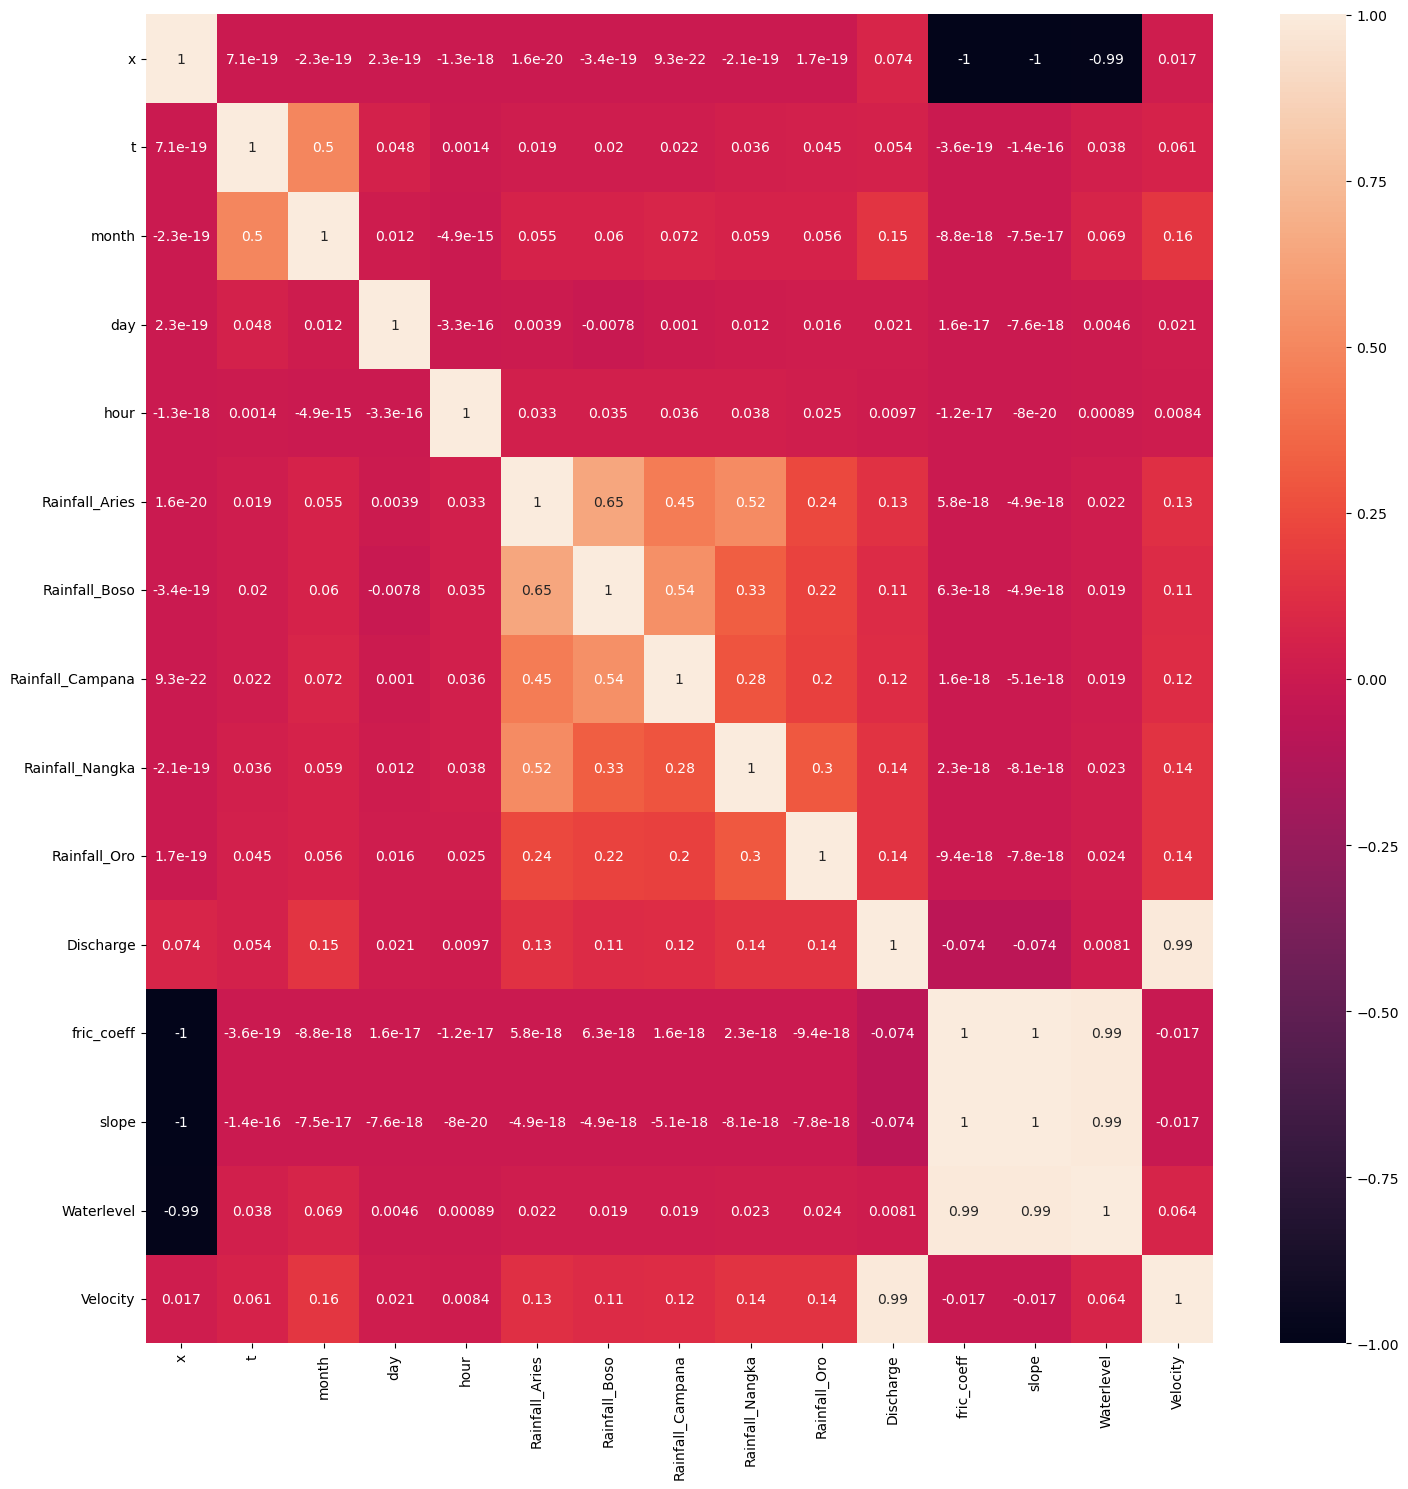

In [12]:
make_corr_heatmap(df)

#### Findings
Feature to Feature
- x are highly negatively correlated with friction coefficient and slope (-1)
- friction coefficient and slope have correlation of 1
- rainfall stations are correlated with each other

Feature to Output
- discharge is highly correlated with velocity
- rainfall is only weakly correlated with water level and velocity
- t has weak correlation with water level and velocity
- x is highly negatively correlated with water level
- friction coefficient and slope are highly positively correlated with water level